<a href="https://colab.research.google.com/github/ThaniNikolaou/DataJour/blob/main/HomeWork_Week10_SentimentalAnalysis_NikolaouTheodora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
from google.colab import drive
drive.mount('/content/gdrive')
import spacy
nlp = spacy.load('el_core_news_sm')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!python -m spacy download el_core_news_sm

In [82]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [81]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [22]:
newsbeast_ekloges_df = pd.read_csv ("/content/gdrive/MyDrive/DATA_JOUR/newsbeast_ekloges.csv")

In [84]:
short_newsbeast_df = newsbeast_ekloges_df[['date','full_text' ]]
short_newsbeast_df = short_newsbeast_df.rename(columns={'full_text': 'text'} )

In [85]:
short_newsbeast_df['date'] = pd.to_datetime(short_newsbeast_df['date'], format='%Y-%m-%d %H:%M')

In [86]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [87]:
wordcount_df[trust_words].sum(axis=1)

0       9
1      25
2       5
3       4
4       3
       ..
145     6
146    12
147     0
148     7
149     7
Length: 150, dtype: int64

In [88]:
short_newsbeast_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_newsbeast_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_newsbeast_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_newsbeast_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_newsbeast_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_newsbeast_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_newsbeast_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_newsbeast_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_newsbeast_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_newsbeast_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [89]:
short_newsbeast_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-06-27 11:49:00+00:00,Μετά τις εθνικές εκλογές της 25ης Ιουνίου ο χρ...,0,14,1,0,1,9,5,0,2,1
1,2023-06-27 11:44:00+00:00,Για τις προτεραιότητες της κυβέρνησης μίλησε τ...,21,35,7,16,6,25,8,15,46,22
2,2023-06-27 11:09:00+00:00,Στους λόγους για τους οποίους αποχώρησε από το...,0,6,1,1,0,5,0,2,4,1
3,2023-06-27 10:52:00+00:00,«Συγχαρητήρια Κυριάκο! Τα κατάφερες!» Με τα λό...,2,7,5,1,0,4,1,2,4,3
4,2023-06-27 09:52:27+00:00,Το μοντέλο Δομινίκη Παπαδοπούλου είχε κατέβει ...,2,5,0,4,1,3,1,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
145,2023-06-25 18:20:00+00:00,"Ο πατέρας του Νίκου Ανδρουλάκη, Μαρίνος, με έν...",1,10,2,1,2,6,3,0,1,1
146,2023-06-25 18:17:49+00:00,Το πρώτο του μήνυμα μετά τη σαρωτική νίκη της ...,5,15,3,3,2,12,6,6,10,5
147,2023-06-25 18:15:34+00:00,"Το κόμμα Σπαρτιάτες μπαίνει στη Βουλή, όπως όλ...",0,1,0,2,0,0,0,1,1,0
148,2023-06-25 18:12:41+00:00,Προσερχόμενος σήμερα το πρωί στο Παλαιό Φάληρο...,2,4,1,3,2,7,5,2,4,0


In [ ]:
short_newsbeast_df.reset_index(inplace=True)
short_newsbeast_df.set_index('date', inplace=True)
short_newsbeast_df

Αριθμός λέξεων ανά ημέρα

<Axes: ylabel='date'>

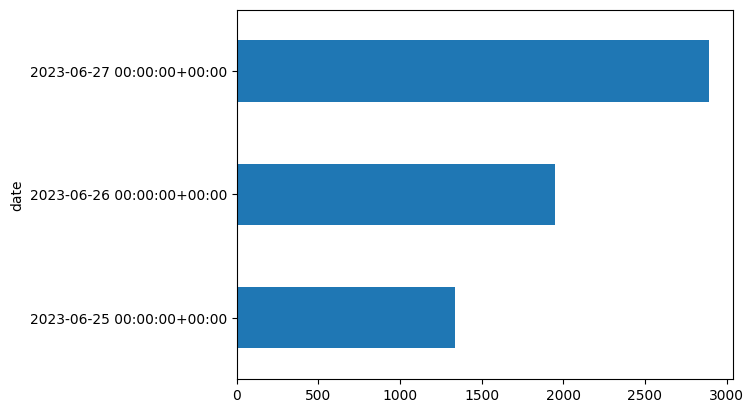

In [91]:
short_newsbeast_df['text'].str.len().resample('D').mean().plot(kind='barh')

Άρθρα ανά ημέρα

<Axes: ylabel='date'>

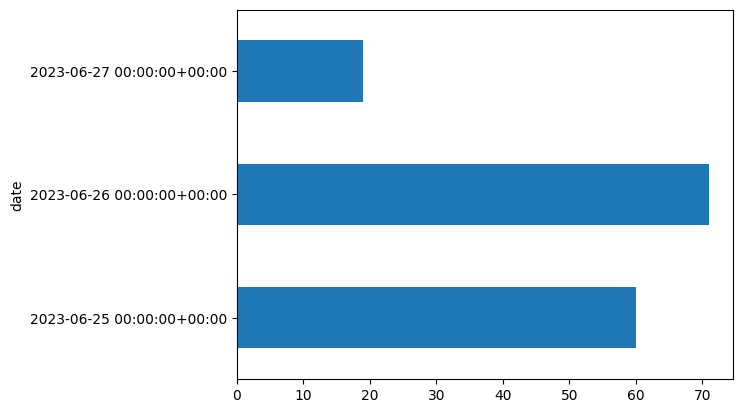

In [92]:
short_newsbeast_df['text'].resample('D').count().plot(kind='barh')

In [ ]:
Άρθρα ανά ώρα

<Axes: xlabel='date'>

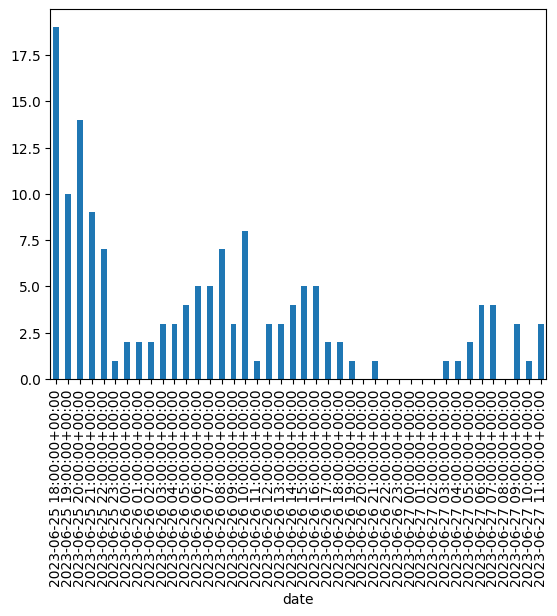

In [93]:
short_newsbeast_df['text'].resample('h').count().plot(kind='bar')

Μέτρηση συναισθημάτων

<Axes: xlabel='date'>

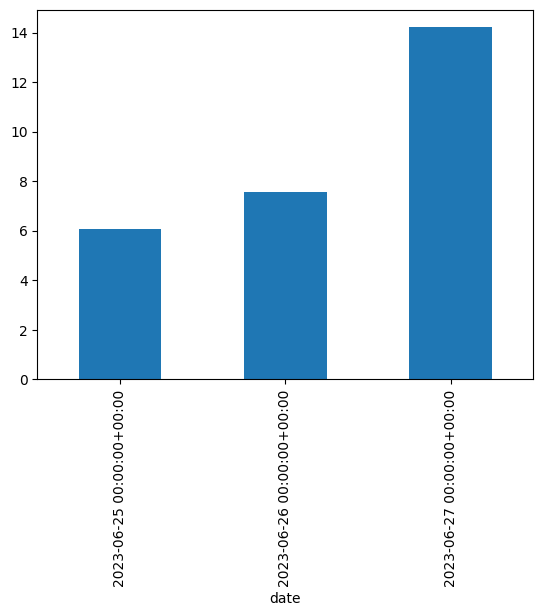

In [98]:
short_newsbeast_df['positive'].resample('D').mean().plot(kind="bar")

<Axes: xlabel='date'>

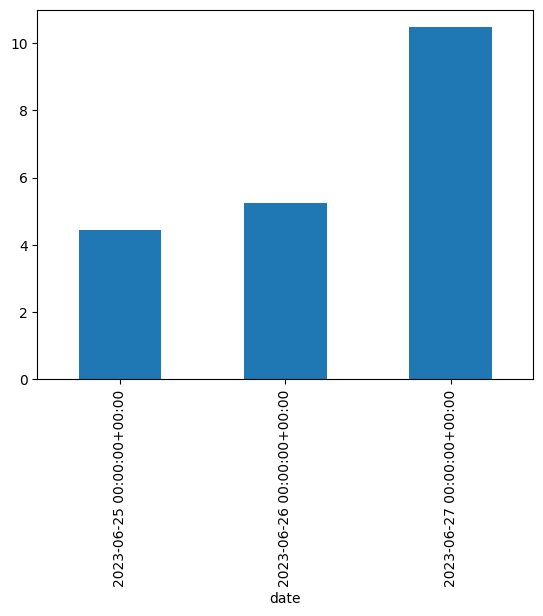

In [96]:
short_newsbeast_df['negative'].resample('D').mean().plot(kind='bar')

<Axes: xlabel='date'>

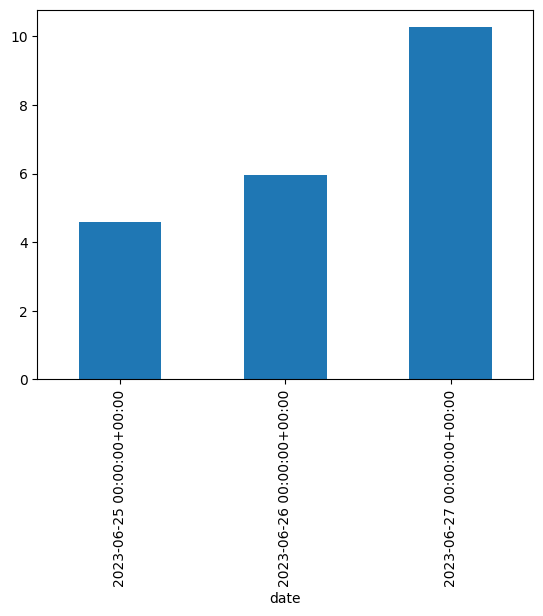

In [99]:
short_newsbeast_df['trust'].resample('D').mean().plot(kind='bar')

<Axes: xlabel='date'>

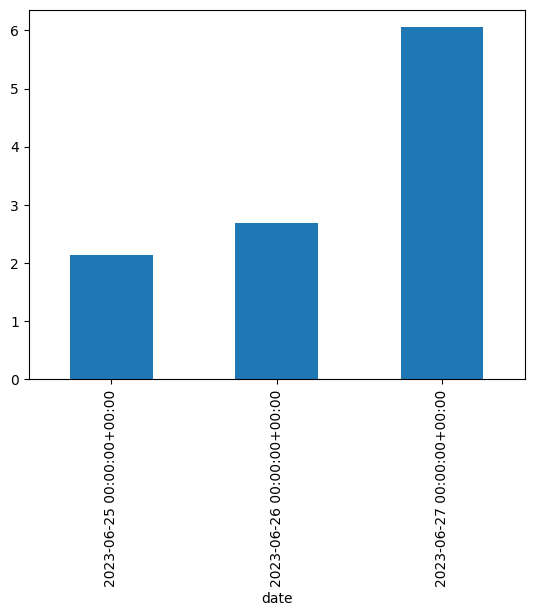

In [100]:
short_newsbeast_df['fear'].resample('D').mean().plot(kind='bar')

<Axes: xlabel='date'>

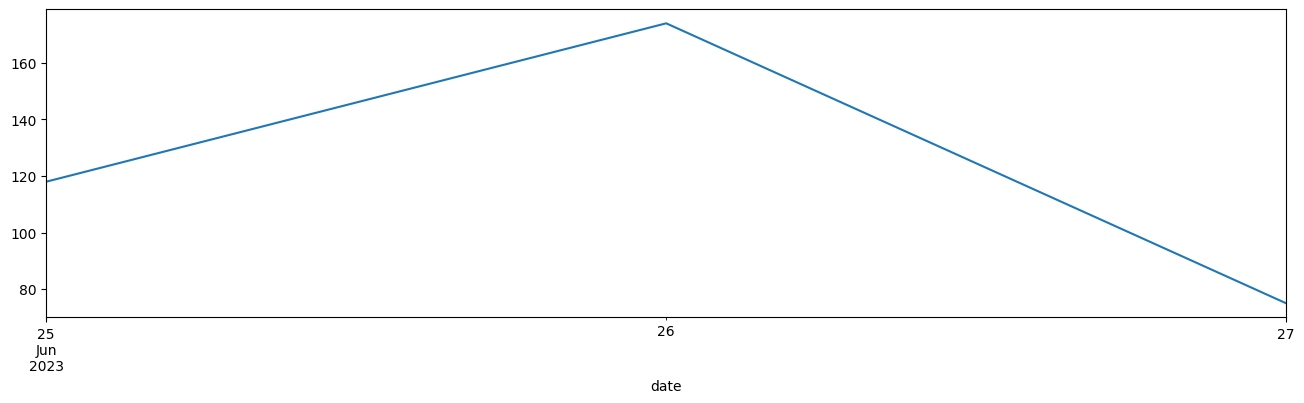

In [101]:
short_newsbeast_df['anger'].resample('D').sum().plot(figsize=(16,4))

Και τα 4 συναισθήματα μαζί

<Axes: xlabel='date'>

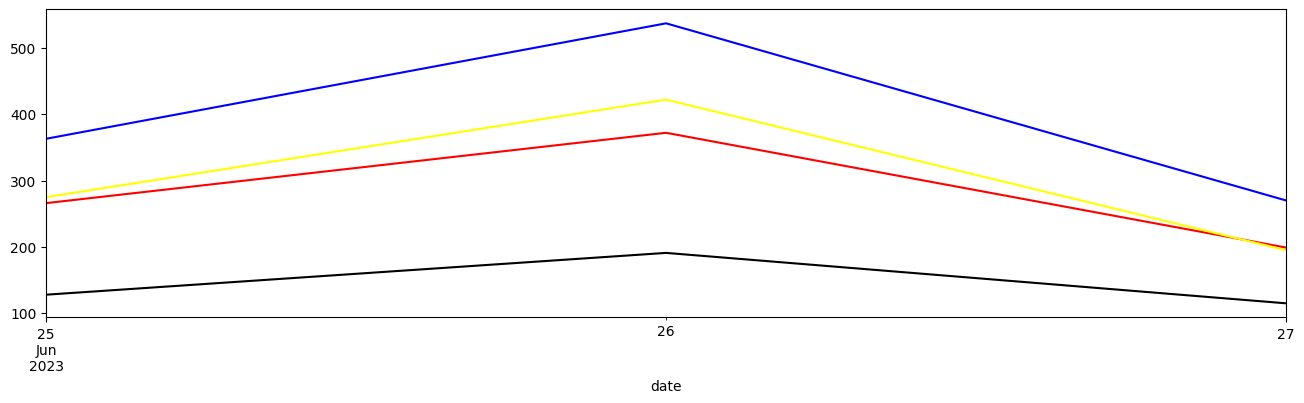

In [103]:
short_newsbeast_df ['positive'].resample('D').sum().plot(figsize=(16,4), color = 'blue')
short_newsbeast_df ['negative'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_newsbeast_df ['trust'].resample('D').sum().plot(figsize=(16,4), color = 'yellow')
short_newsbeast_df ['fear'].resample('D').sum().plot(figsize=(16,4), color = 'black')

In [104]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

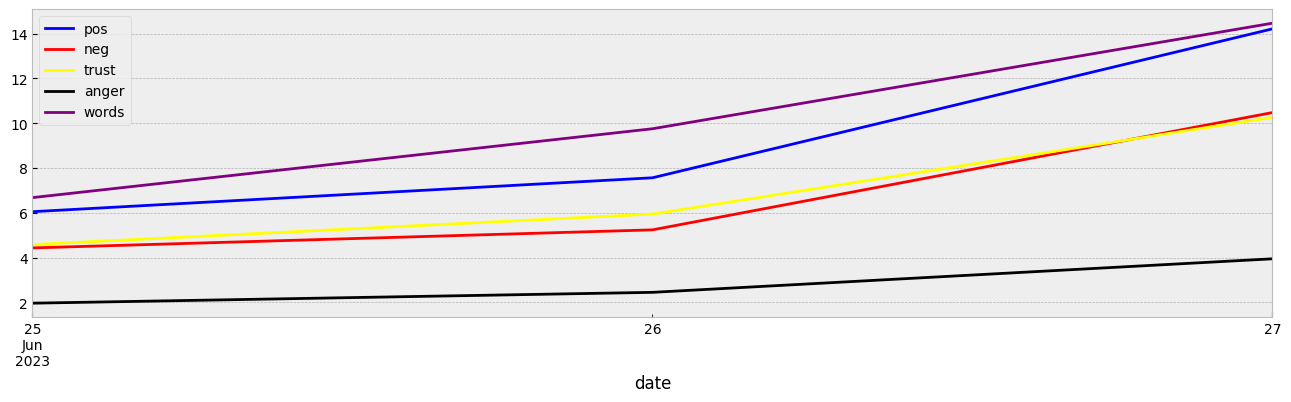

In [109]:
ax = short_newsbeast_df['positive'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'blue', label='pos')
short_newsbeast_df['negative'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'red')
short_newsbeast_df['trust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'yellow').legend()
short_newsbeast_df['anger'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'anger',color = 'black').legend()
(short_newsbeast_df['text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'purple').legend()

In [110]:
plt.style.use('seaborn-v0_8-pastel')

<Axes: xlabel='date'>

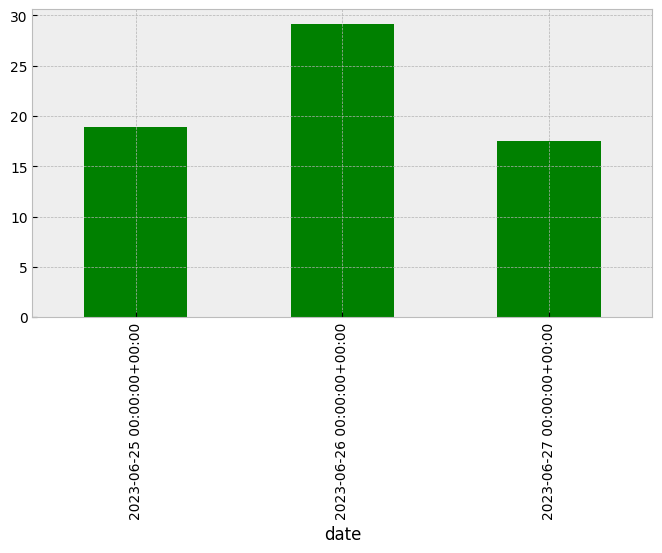

In [111]:
short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'] = short_newsbeast_df.positive*100//short_newsbeast_df[['positive','negative']].sum(
        axis=1) - short_newsbeast_df.negative*100//short_newsbeast_df[['positive','negative']].sum(axis=1)

short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [112]:
short_newsbeast_df[(short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'] == short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'] == short_newsbeast_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-06-26 17:04:00+00:00,24,1,0,100.0
2023-06-26 16:13:00+00:00,28,3,0,100.0
2023-06-26 15:31:00+00:00,30,2,0,100.0
2023-06-26 15:21:54+00:00,32,2,0,100.0
2023-06-26 13:43:00+00:00,39,2,0,100.0
2023-06-26 13:29:33+00:00,41,5,0,100.0
2023-06-26 10:50:00+00:00,47,4,0,100.0
2023-06-26 10:45:54+00:00,48,4,0,100.0
2023-06-26 10:07:04+00:00,52,2,0,100.0


In [114]:
newsbeast_ekloges_df.loc[[24,28,30,32,39,41,47,48,52,62,63,76,78,87,102,112,114,133,140], ['url','title', 'full_text']]

,url,title,full_text
24,https://www.newsbeast.gr//politiki/arthro/9803...,Εκλογές 2023: Τη βουλευτική έδρα του Βόρειου Τ...,Τη βουλευτική έδρα που κατέκτησε στον Βόρειο Τ...
28,https://www.newsbeast.gr//politiki/arthro/9803...,Την Τρίτη στις 14:30 η τελετή παράδοσης – παρα...,Αύριο στις 14:30 η τελετή παράδοσης παραλαβής ...
30,https://www.newsbeast.gr//politiki/arthro/9802...,Με άρωμα γυναίκας η σύνθεση της νέας Βουλής – ...,Αυξάνεται ο αριθμός των γυναικών που θα εκπροσ...
32,https://www.newsbeast.gr//politiki/arthro/9802...,Κυριάκος Μητσοτάκης: Το πρώτο tweet μετά την ο...,Στα πρωθυπουργικά του καθήκοντα στο Μέγαρο Μαξ...
39,https://www.newsbeast.gr//politiki/arthro/9802...,Έληξε το «θρίλερ» σε τρεις εκλογικές περιφέρει...,Εκτός Βουλής έμεινε τελικώς στην Α’ Αθήνας ο Ά...
41,https://www.newsbeast.gr//politiki/arthro/9802...,Αντίστροφη μέτρηση για το νέο υπουργικό – «Κλε...,Ο Μιλτιάδης Βαρβιτσιώτης θα είναι όπως όλα δεί...
47,https://www.newsbeast.gr//politiki/arthro/9801...,Η Κρήτη «βάφτηκε μπλε» και στις δεύτερες εκλογ...,Τα αποτελέσματα της χθεσινοβραδινής εκλογικής ...
48,https://www.newsbeast.gr//politiki/arthro/9801...,Συγκινημένες οι αδελφές του Κυριάκου Μητσοτάκη...,Ο Κυριάκος Μητσοτάκης ορκίστηκε πρωθυπουργός κ...
52,https://www.newsbeast.gr//politiki/arthro/9801...,Ο Κυριάκος Μητσοτάκης με τη Μαρέβα και τα παιδ...,Με τη σύζυγό του και τα παιδιά τους έφτασε ο π...
62,https://www.newsbeast.gr//politiki/arthro/9800...,Ο ξένος Τύπος για το εκλογικό αποτέλεσμα στην ...,Οι ελληνικές εκλογές απασχόλησαν τα διεθνή μέσ...
